In this project, we will create a simple GAN to generate images similar to the Fashion-MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
print('tensorflow version: {}'.format(tf.__version__))
print('keras version: {}'.format(keras.__version__))

tensorflow version: 2.1.0
keras version: 2.2.4-tf


## Download the fashion_mnist dataset

In [2]:
# import the fashion_MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print('shape of X_train: {}'.format(X_train.shape))
print('shape of y_train: {}'.format(y_train.shape))
print('shape of X_test: {}'.format(X_test.shape))
print('shape of y_test: {}'.format(y_test.shape))

shape of X_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of X_test: (10000, 28, 28)
shape of y_test: (10000,)


#### Visualize a bunch of random images in the dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img_idx = np.random.randint(low = 0, high = 60000, size = 16)

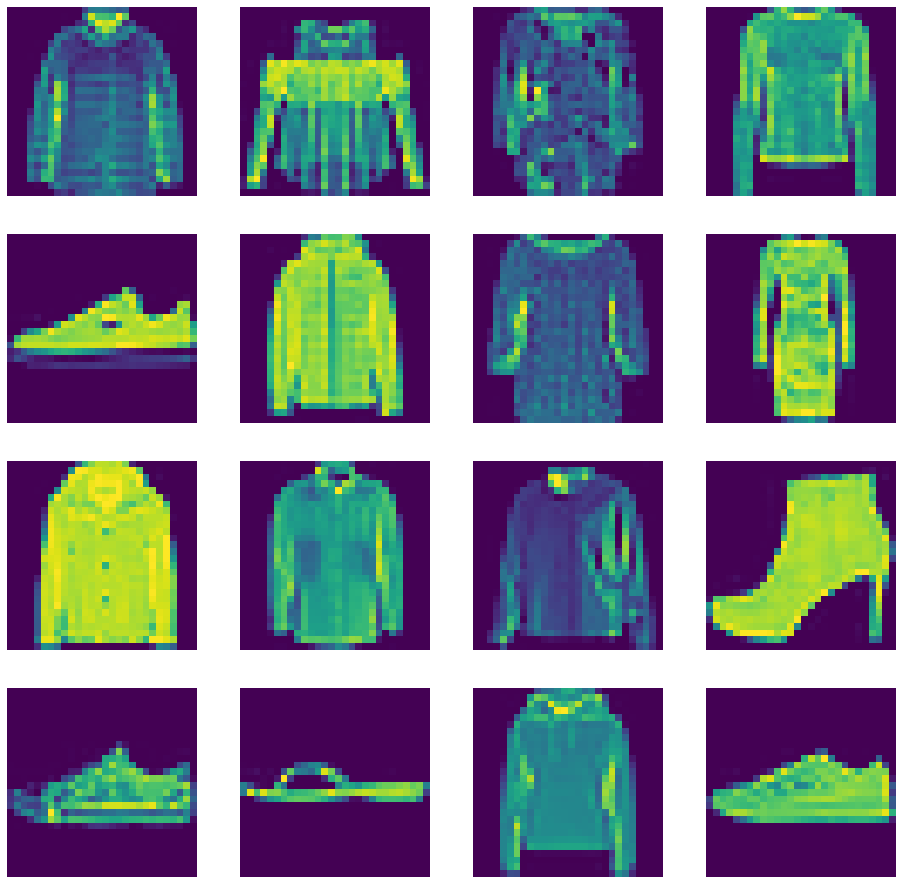

In [6]:
fig, ax = plt.subplots(figsize = (16, 16), nrows = 4, ncols = 4)
ctr = 0
for row in range(4):
    for col in range(4):
        ax[row, col].imshow(X_train[img_idx[ctr]])
        ax[row, col].axis('off')
        ctr+=1
       

## Define a GAN model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization

In [12]:
coding_size = 30
l1 = Dense(100, activation = 'selu', input_shape = (None, coding_size))
l2 = BatchNormalization()
l3 = Dense(150, activation = 'selu')
l4 = BatchNormalization()
l5 = Dense(28*28, activation = 'sigmoid')
l6 = Reshape([28,28])
layer_list = [l1,l2,l3,l4,l5,l6]

generator = Sequential()
for layer in layer_list:
    generator.add(layer)

In [13]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 100)         3100      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 100)         400       
_________________________________________________________________
dense_1 (Dense)              (None, None, 150)         15150     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 150)         600       
_________________________________________________________________
dense_2 (Dense)              (None, None, 784)         118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 137,634
Trainable params: 137,134
Non-trainable params: 500
______________________________________________